In [1]:
import scycle as sy
import scanpy as sc
import numpy as np

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/'
sys.path.append(DATA_PATH)

In [2]:
adata = sc.read_h5ad(DATA_PATH + 'CCLE/CPM_data_pp.h5ad')
adata

AnnData object with n_obs × n_vars = 53513 × 22590
    obs: 'Cell_line', 'Cancer_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [3]:
adata = adata[adata.obs['Cancer_type'] == 'Head and Neck Cancer',:]
adata

View of AnnData object with n_obs × n_vars = 7102 × 22590
    obs: 'Cell_line', 'Cancer_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [4]:
adata_ref = adata[adata.obs['Cell_line'].str.contains('JHU011')]
adata_ref

View of AnnData object with n_obs × n_vars = 717 × 22590
    obs: 'Cell_line', 'Cancer_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [5]:
adata_src = adata[np.logical_not(adata.obs['Cell_line'].str.contains('JHU011'))]
adata_src

View of AnnData object with n_obs × n_vars = 6385 × 22590
    obs: 'Cell_line', 'Cancer_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [6]:
sy.tl.dimensionality_reduction(adata_ref, method='ica', pp_by_scycle=False)
adata_ref

Trying to set attribute `.uns` of view, copying.


-- Dimensionality reduction using ICA...


AnnData object with n_obs × n_vars = 717 × 22590
    obs: 'Cell_line', 'Cancer_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scycle', 'dimRed'
    obsm: 'X_dimRed', 'X_dimRed2d'

In [8]:
sy.tl.integration(adata_src, adata_ref, verbose=True, eps=1e-2)
adata_src

-- Integrating datasets
> Projecting source dataset...
> Computing distance matrix...
> Computing optimal transport plan...
> Projecting source dataset...


AnnData object with n_obs × n_vars = 6385 × 22590
    obs: 'Cell_line', 'Cancer_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_dimRed', 'X_dimRed2d'

In [9]:
Xs = adata_src.obsm["X_dimRed2d"]

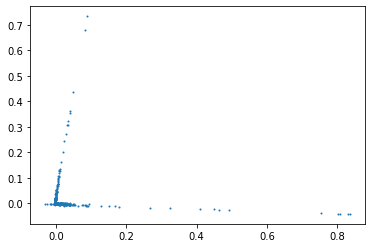

In [10]:
import matplotlib.pyplot as plt
plt.scatter(Xs[:,0], Xs[:,1], s=1)